# IMPORT

In [ ]:
  !sudo apt-get install -y fonts-nanum
  !sudo fc-cache -fv
  !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (7,463 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122545 files and di

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random


# 라벨 인코딩을 위한 라이브러리
from sklearn.preprocessing import LabelEncoder

# 홀드아웃, 교차 검증을 위한 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# 정확도 계산 라이브러리
from sklearn.metrics import accuracy_score

# lightgbm 라이브러리
import lightgbm as lgb

# 랜덤 시드 설정
np.random.seed(1234)
random.seed(1234)
# 스타일 설정
plt.style.use("ggplot")
# 폰트 설정
plt.rc('font', family='NanumBarunGothic')

In [ ]:
# 구글드라이브 사용
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 데이터 불러오기
train_df = pd.read_csv('경로/train.csv')
test_df = pd.read_csv('경로/test.csv')
submission = pd.read_csv('경로/gender_submission.csv')

# 데이터 개요 파악

In [ ]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
# 데이터 행과 열 확인하기
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [ ]:
# 표시할 수 있는 열과 행의 개수 변경 -?
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 50)

In [ ]:
# 데이터 내용 미리보기
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# 데이터 내용 미리보기
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# 데이터 내 각 열 값의 속성 조회
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

-> Pclass(티켓 등급) : 질적 변수, 순서 척도

-> Age(연령) : 양적 변수, 비례 척도

-> Fare(티켓 요금) : 양적 변수, 비례 척도

In [ ]:
# 수치 데이터의 개요 확인하기
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# 수치 데이터의 개요 확인하기
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
# 성별 카테고리 변수 확인하기
train_df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
# 승선한 항구 이름 카테고리 변수 확인하기
train_df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
# 방 번호 카테고리 변수 확인하기
train_df["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
# 결측치 확인하기
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# 결측치 확인하기
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

-> 모두 age 및 cabin 속성에 결측치가 많음을 알 수 있음

(+ fare 열 한개)

# 데이터 시각화

### 승선 항구별 생존율 시각화

In [ ]:
train_df[["Embarked", "Survived", "PassengerId"]]

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [ ]:
# drop_na() : 결측치를 포함한 행 제거
train_df[["Embarked", "Survived", "PassengerId"]].dropna()

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [ ]:
# count() : 집계
train_df[["Embarked", "Survived", "PassengerId"]].dropna().groupby(["Embarked", "Survived"]).count()

PassengerId
Embarked Survived             
C        0                  75
         1                  93
Q        0                  47
         1                  30
S        0                 427
         1                 217

데이터를 정렬하는 방법

수직 정렬 : 세로로 정렬 ( 위와 같은 정렬 )

수평 정렬 : 가로로 정렬 ( 아래와 같은 정렬 )

In [ ]:
# unstack() : 가로 세로 변환 (수평 데이터로 변환)
embarked_df = train_df[["Embarked", "Survived", "PassengerId"]].dropna().groupby(["Embarked", "Survived"]).count().unstack()
embarked_df

PassengerId     
Survived           0    1
Embarked                 
C                 75   93
Q                 47   30
S                427  217

<Axes: xlabel='Embarked'>

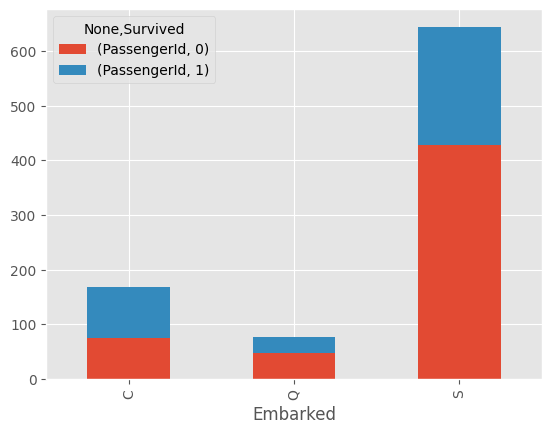

In [ ]:
# 누적 막대 그래프로 시각화
embarked_df.plot.bar(stacked=True)

-> 승선 항구가 C일 때는 절반 정도 사망했지만 Q, S일 때는 절반 이상이 사망한 것으로 보임

-> 승선 항구에 따라 유형이나 상태에 차이가 있었을지도 모른다는 사실 파악

In [ ]:
# 이 비율을 수치로 파악하기
embarked_df["survived_rate"] = embarked_df.iloc[:,0]/(embarked_df.iloc[:,0]+embarked_df.iloc[:,1])
embarked_df

PassengerId      survived_rate
Survived           0    1              
Embarked                               
C                 75   93      0.446429
Q                 47   30      0.610390
S                427  217      0.663043

### 성별별 생존율 시각화

<Axes: xlabel='Sex'>

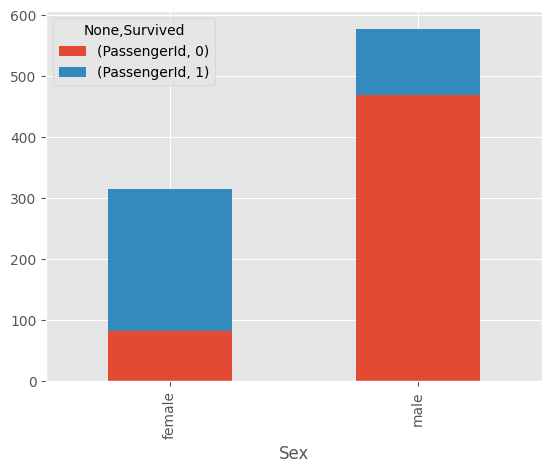

In [ ]:
# 누적 막대 그래프로 시각화
sex_df = train_df[["Sex", "Survived", "PassengerId"]].dropna().groupby(["Sex", "Survived"]).count().unstack()
sex_df.plot.bar(stacked = True)

In [ ]:
# 이 비율을 수치로 파악하기
sex_df["survived_rate"] = sex_df.iloc[:,0]/(sex_df.iloc[:,0]+sex_df.iloc[:,1])
sex_df

PassengerId      survived_rate
Survived           0    1              
Sex                                    
female            81  233      0.257962
male             468  109      0.811092

-> 여성의 생존율이 더 높은 것을 확인할 수 있음

### 티켓 등급별 생존율 시각화

<Axes: xlabel='Pclass'>

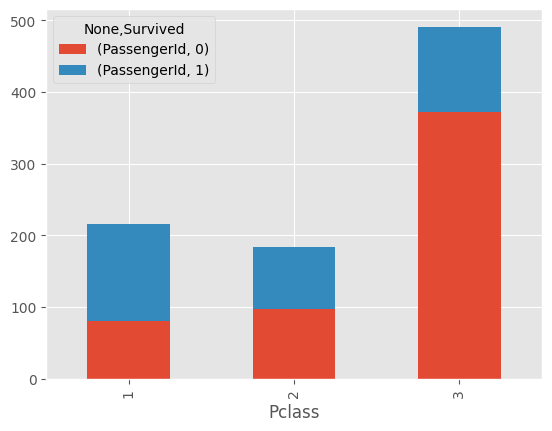

In [ ]:
# 누적 막대 그래프로 시각화
ticket_df = train_df[["Pclass", "Survived", "PassengerId"]].dropna().groupby(["Pclass", "Survived"]).count().unstack()
ticket_df.plot.bar(stacked = True)

In [ ]:
# 이 비율을 수치로 파악하기
ticket_df["survived_rate"] = ticket_df.iloc[:,0]/(ticket_df.iloc[:,0]+ticket_df.iloc[:,1])
ticket_df

PassengerId      survived_rate
Survived           0    1              
Pclass                                 
1                 80  136      0.370370
2                 97   87      0.527174
3                372  119      0.757637

-> 티켓 등급이 높을수록 생존율이 높은 것을 확인할 수 있음

### 연령별 생존율 히스토그램으로 시각화

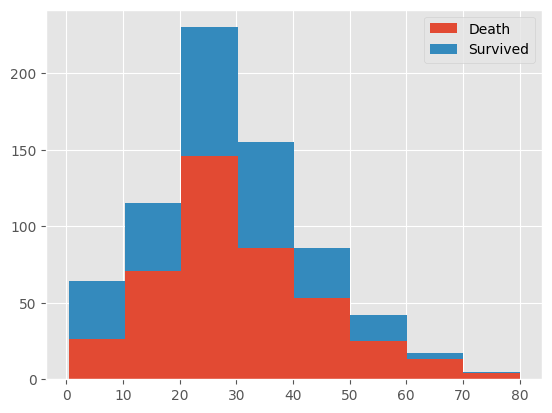

In [ ]:
 plt.hist(x = [train_df.Age[train_df.Survived==0],train_df.Age[train_df.Survived == 1]], bins=8, histtype = 'barstacked', label = ["Death", "Survived"])
 plt.legend()

-> 10세 이하의 아이들이 다른 연령층에 비해 생존율이 높은 것을 확인할 수 있음

### 카테고리 변수를 더미 변수화하기

각 변수와 Survived 변수 간 상관성 분석 필요
-> 수치 데이터에서만 실행 가능

수치 데이터가 아닐 경우 수치로 변환 필요!

카테고리 변수를 수치 데이터로 변환하기 위해서 원-핫 인코딩 사용

원-핫 인코딩 : 어떤 카테고리 변수에 대하여 그 값인지 여부를 1, 0으로 나타내는 방법

(0, 1로 나타내는 것을 더미 변수화한다고도 표현함)

#### 성별, 승선 항구 더미 변수화하기

In [ ]:
# pd.get_dummis(데이터 프레임명, columns = ["변수화하고 싶은 열명"]) : 원-핫 인코딩으로 더미 변수화
train_df_corr = pd.get_dummies(train_df, columns = ["Sex"], drop_first=True)
#Drop_first = True를 사용하여 열 하나로 축소 (male이 1이라면 female은 반드시 0이기 때문)
train_df_corr = pd.get_dummies(train_df_corr, columns = ["Embarked"])
train_df_corr.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,0,1


### 상관 행렬 작성 & 히트맵 시각화

상관 행렬 : 상관 계수를 나열하여 -1~1의 수치로 확인하는 것

In [ ]:
# corr() : 각 변수 간 상관 계수(얼마나 직선형인가)를 계산
train_corr = train_df_corr.corr()
train_corr

<ipython-input-32-8162aeb6e776>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_corr = train_df_corr.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.042939,-0.001205,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900,-0.243292,0.221009,0.081720
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,0.036261,-0.022405,-0.032523
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631,-0.059528,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333,0.269335,-0.117216,-0.166603
Sex_male,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,-0.001205,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,-0.082853,1.000000,-0.148258,-0.778359
Embarked_Q,-0.033606,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,-0.074115,-0.148258,1.000000,-0.496624


<Axes: >

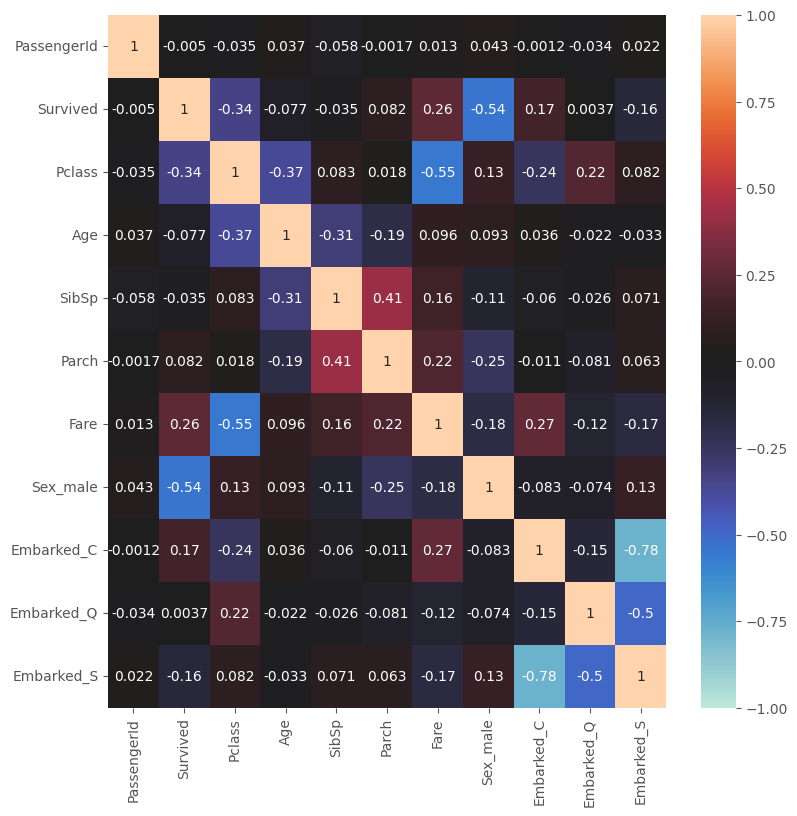

In [ ]:
plt.figure(figsize = (9, 9))
sns.heatmap(train_corr, vmax = 1, vmin = -1, center = 0, annot = True)

"Survived"행과의 상관관계를 확인해야 함

-> Sex_male과 가장 상관관계가 높음

-0.54로, 남성을 1로 두었기 때문에 남성의 생존율은 낮고 여성의 생존율은 높았음을 보여줌

-> Pclass가 -.034로 이어서 높음

티켓 등급이 높은 쪽(수가 작은 쪽)의 생존율이 높았음을 보여줌

-> Fare가 0.26으로 이어서 높음

-> Age는 전체적으로 -0.077이므로 Survived와는 상관 없어보임

그러나 이만으로 판단하면 안됨. 상관 계수는 두 변수 사이에서 한쪽 변수 값이 오름에 따라 다른 쪽 값도 올라가는(혹은 내려가는)경향이 있는지 나타냄

10세 이하가 다른 연령대보다 생존율이 높은 경향이 있더라도 다른 연령대의 생존율이 반대라면 평균은 다시 낮아짐

따라서 상관 계수는 어디까지나 참고만 하는 편이 좋음

예측에서 각 변수의 중요도는 모델링을 하며 확인해보자

# 데이터 전처리와 특징 값 생성

앞서 살펴본 바와 같이 데이터는 변환 없이 그대로 사용하기 어려운 형태가 포함되어있음

또한 모델이 읽을 수는 있지만, 더 좋은 형태로 변형시키는 편이 정확도가 좋아지는 것도 있음

결측치도 존재하기 때문에 그것을 어떻게 처리할 지도 생각해야 함

-> 전처리 과정

우리는 Fare(티켓 요금), Name, Parch(승선 중인 부모나 자녀의 수), SibSp(승선 중인 형제나 배우자의 수)에 주목하여 전처리 할 것

### 학습 데이터와 텍스트 데이터의 통합

전체 집계나 통계 정보를 얻기 위함

In [ ]:
# concat([결합하고 싶은 데이터프레임 1, 결합하고 싶은 데이터프레임 2])
# reset_index() : 행 번호 매기기
# sort = False : 결합 후 행 순서가 바뀌지 않음
# drop = True : 원래 행 번호 삭제
all_df = pd.concat([train_df, test_df], sort = False).reset_index(drop = True)
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### 결측치 처리

In [ ]:
# 전체 데이터로 결측치 수 확인하기
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

#### Fare 결측치 처리

Fare값에 결측치 하나 존재

이 값을 채우기 위해 먼저 Pclass별 Fare의 평균을 구한 후 Pclass의 평균값으로 해당 결측치 채우기

In [ ]:
Fare_mean = all_df[["Pclass", "Fare"]].groupby("Pclass").mean().reset_index()

In [ ]:
Fare_mean.columns = ["Pclass", "Fare_mean"]

In [ ]:
Fare_mean

,Pclass,Fare_mean
0,1,87.508992
1,2,21.179196
2,3,13.302889


iloc() : 열번호, 행번호로 범위 지정

loc() : 열명, 행명으로 범위 지정

In [ ]:
# all_df와 Fare_mean을 Pclass를 기준으로 합친 후 결손된 곳에 이를 사용하여 보충 & 필요하지 않아진 Fare_mean 삭제
all_df = pd.merge(all_df, Fare_mean, on="Pclass", how = "left")
all_df.loc[(all_df["Fare"].isnull()), "Fare"] = all_df["Fare_mean"]
all_df = all_df.drop("Fare_mean", axis = 1)

#### Name을 사용한 Age 결측치 처리

In [ ]:
all_df["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

-> 성씨, 호칭, 이름 순으로 기재되어 있음

이때, 호칭은 Master, Mr, Miss, Mrs 등으로 일반적으로 연령/성별에 관계 있음

Master : 주로 남자 아이

Mr : 주로 일반 남성

Miss : 미혼 여성 (Mrs보다 연령 낮을 가능성)

Mrs : 기혼 여성 (Miss보다 연령 높을 가능성

In [ ]:
# 호칭 추출 : Name을 str을 사용해 문자열로 취득한 후 split()을 사용하여 , 혹은 .로 구분한 후, idx : 1이 호칭
name_df = all_df["Name"].str.split("[,.]",2,expand = True)
# 열의 이름 변경
name_df.columns = ["family_name", "honorific", "name"]
name_df

<ipython-input-41-cc7e15c83f84>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  name_df = all_df["Name"].str.split("[,.]",2,expand = True)


,family_name,honorific,name
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [ ]:
# strip() : 공백 문자 삭제
# 혹시 모르니 각 열에 모두 적용
name_df["family_name"] = name_df["family_name"].str.strip()
name_df["honorific"] = name_df["honorific"].str.strip()
name_df["name"] = name_df["name"].str.strip()

In [ ]:
# 호칭마다 인원수 세기
name_df["honorific"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: honorific, dtype: int64

-> 보다 다양한 호칭이 있다는 것을 알 수 있음

In [ ]:
# 호칭별 연령분포 확인하기 (axis = 1 : 가로로 결합)
all_df = pd.concat([all_df, name_df], axis = 1)
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick


<Axes: xlabel='honorific', ylabel='Age'>

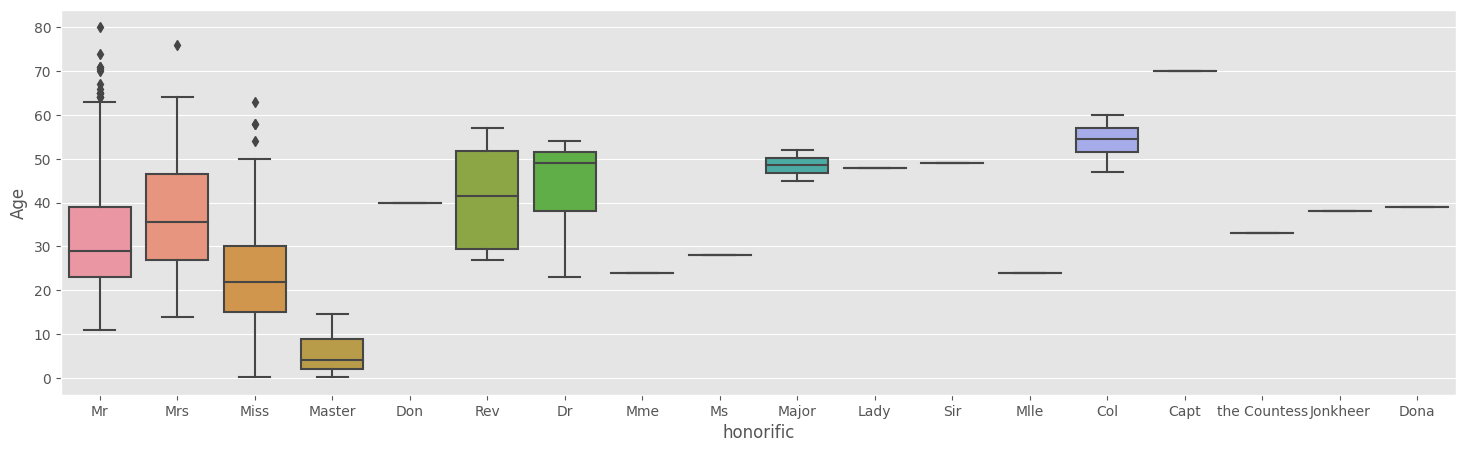

In [ ]:
# 박스 플롯을 이용하여 all_df의 호칭별 연령 분포 확인
plt.figure(figsize = (18, 5))
sns.boxplot(x = "honorific", y = "Age", data = all_df)

In [ ]:
# 호칭별 연령 평균 확인
all_df[["Age", "honorific"]].groupby("honorific").mean()

,Age
honorific,
Capt,70.000000
Col,54.000000
Don,40.000000
Dona,39.000000
Dr,43.571429
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,5.482642


In [ ]:
# 호칭별 생존율 차이 확인

In [ ]:
# 원래 데이터프레임에 이름을 구분해놓은 데이터프레임 결합
train_df = pd.concat([train_df, name_df[0:len(train_df)].reset_index(drop = True)],axis = 1)
test_df = pd.concat([test_df, name_df[len(train_df):].reset_index(drop = True)],axis = 1)

<Axes: xlabel='honorific'>

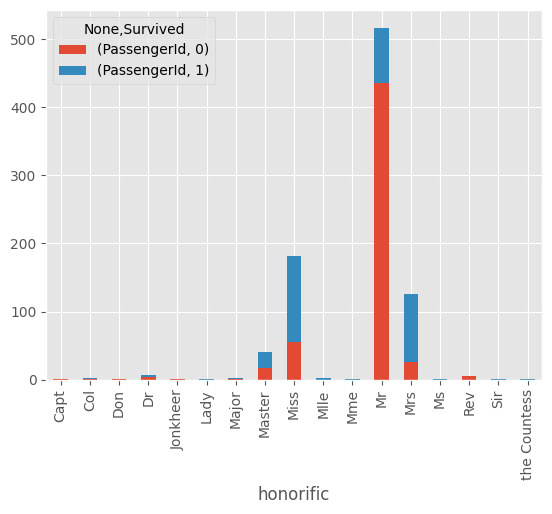

In [ ]:
# 결측치를 포함한 행을 제외하고 honorific, Survived별로 인원수 집계
honorific_df = train_df[["honorific", "Survived", "PassengerId"]].dropna().groupby(["honorific", "Survived"]).count().unstack()
honorific_df.plot.bar(stacked = True)

-> 여성에게 사용되는 Miss나 Mrs는 생존율이 높은 반면, 남성에게 사용되는 Mr는 사망률이 높은 것을 확인할 수 있음

-> 또 Master가 Mr에 비해 생존율이 높음

-> 앞서 확인한 성별, 연령 생존율과 같은 영향을 띄는 것을 확인할 수 있음

-> 연령은 결측치가 많은 데이터이므로 호칭 데이터가 이를 보완해주는 효과적인 변수가 될 것

In [ ]:
# all_df와 honorific_age_mean을 honorific을 기준으로 합친 후 결손된 곳에 이를 사용하여 보충 & 필요하지 않아진 honorific_Age 삭제
honorific_age_mean = all_df[["honorific", "Age"]].groupby("honorific").mean().reset_index()
honorific_age_mean.columns = ["honorific", "honorific_Age"]
all_df = pd.merge(all_df, honorific_age_mean, on = "honorific", how = "left")
all_df.loc[(all_df["Age"].isnull()),"Age"] = all_df["honorific_Age"]
all_df = all_df.drop(["honorific_Age"], axis = 1)

### 가족 인원수 & 홀로 승선 여부

In [ ]:
# 총 가족 인원수 추가
all_df["family_num"] = all_df["Parch"]+all_df["SibSp"]
all_df["family_num"].value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: family_num, dtype: int64

In [ ]:
# 홀로 승선 여부 새로운 변수로 추가
# 우선 혼자 온 사람들을 1로 표시한 후 fillna를 사용하여 나머지 0으로 표시
all_df.loc[all_df["family_num"]==0, "alone"] = 1
all_df["alone"].fillna(0, inplace = True)

### 불필요한 변수 삭제

PassengerId : 단순 승객 id이므로 불필요 제거

Name : family_name, honorific, name으로 분할했으니 제거

name : 고유명사 & 생존과 관계 X 제거

family_name : 데이터 수에 비해 가족 수가 많고 혼자 가는 승객도 많아 가족 단위 분석은 어렵기에 제거

Ticket : 생존 규칙을 찾기 어렵기 때문에 제거

Cabin : 결손이 너무 많기 때문에 제거

In [ ]:
# 불필요한 변수 삭제하기
all_df = all_df.drop(["PassengerId", "Name", "family_name", "name", "Ticket", "Cabin"], axis = 1)

In [ ]:
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0,1.0


### 카테고리 변수 수치로 변환

In [ ]:
# 변수 형태가 object인 것을 카테고리 변수로 관리
categories = all_df.columns[all_df.dtypes == "object"]
print(categories)

Index(['Sex', 'Embarked', 'honorific'], dtype='object')


In [ ]:
# Mr, Miss, Mrs, Master 이외에는 모두 other로 통합
all_df.loc[~((all_df["honorific"]=="Mr")|(all_df["honorific"]=="Miss")|(all_df["honorific"]=="Mrs")|(all_df["honorific"]=="Master")),"honorific"] = "other"

In [ ]:
all_df.honorific.value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
other      34
Name: honorific, dtype: int64

라벨 인코딩 사용 !

원-핫 : 해당 항목 1, 아닐 경우 0

라벨 : 변수 선택을 숫자로 변환 (대소 의미 X)

In [ ]:
# 결측치가 있음에도 encoder 작동을 위해 우선 임의로 missing으로 채우기
all_df["Embarked"].fillna("missing", inplace = True)
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0,1.0


In [ ]:
# 성별 열 라벨 인코딩
le = LabelEncoder()
le = le.fit(all_df["Sex"])
all_df["Sex"] = le.transform(all_df["Sex"])

In [ ]:
# 앞서 카테고리 변수로 설정한 데이터프레임을 활용하여 전체 카테고리변수 라벨 인코딩 시행
for cat in categories:
  le = LabelEncoder()
  print(cat)
  if all_df[cat].dtypes == "object" :
    le = le.fit(all_df[cat])
    all_df[cat] = le.transform(all_df[cat])

Sex
Embarked
honorific


In [ ]:
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,1,22.0,1,0,7.2500,2,2,1,0.0
1,1.0,1,0,38.0,1,0,71.2833,0,3,1,0.0
2,1.0,3,0,26.0,0,0,7.9250,2,1,0,1.0
3,1.0,1,0,35.0,1,0,53.1000,2,3,1,0.0
4,0.0,3,1,35.0,0,0,8.0500,2,2,0,1.0


### 모든 데이터를 학습 데이터와 테스트 데이터로 돌려놓기

In [ ]:
train_X = all_df[~all_df["Survived"].isnull()].drop("Survived", axis = 1).reset_index(drop = True)
train_Y = train_df["Survived"]

test_X = all_df[all_df["Survived"].isnull()].drop("Survived", axis = 1).reset_index(drop = True)

-> 준비 완료 !!!! 머신러닝 하자 ~

# 머신러닝 모델링

병렬로 앙상블 하는 것이 아니라 결정 트리를 순서대로 갱신해나가는 그레이디언트 부스팅 결정 트리인 lightgbm 사용

-> 실행 속도가 다른 기법들보다 빠름

-> 결측치나 카테고리 변수가 포함된 상태에서도 모델을 학습시킬 수 있음

과소적합을 피하며 과적합이 발생하지 않도록 튜닝하는 작업 필요

-> 학습 데이터에서 검증 데이터를 분리하는 과정이 필요

-> 학습 데이터로 작성한 모델을 검증 데이터로 검증하는 것

-> 다음과 같이 다양한 방법으로 작성 가능

    홀드 아웃 : 특정 비율로 분할 (검증 데이터 예측에만 과도하게 적합해져 과적합 발생 가능성 존재)
  
    교차 검증 : 전체를 임의 수의 블록으로 분할하여 하나는 검증 데이터, 나머지는 학습 데이터로 사용 & 분할된 데이터 수만큼 반복 (더 많은 데이터로 미지의 데이터에 대한 정확도를 검증할 수 있어 더 좋은 모델을 만들 수 있음)

    잭나이프법 : 전체 테스트 중 하나를 검증 데이터, 나머지를 학습 데이터로 하는 과정을 전체 데이터 수만큼 반복 (데이터 수가 적을 때 이용)

    일반적으로 데이터가 어느 정도 있을 때는 교차 검증을 이용하는 것이 좋음

    데이터 크기가 매우 커 학습에 시간이 걸릴 때에는 홀드 아웃을 사용하기도 함

    여기서는 홀드 아웃, 교차 검증을 이용

In [ ]:
# 20%를 검증 데이터로 분할
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size = 0.2)

In [ ]:
# 카테고리 변수를 지정한 후 lightgbm용 데이터셋 작성
categories = ["Embarked","Pclass", "Sex", "honorific", "alone"]

lgb_train = lgb.Dataset(X_train, y_train, categorical_feature = categories)
lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature = categories, reference = lgb_train)

In [ ]:
# 하이퍼파라미터 설정
# objective -> binary, regression, multiclass 중 선택
# 여기서는 생존과 사망 두개의 분류이므로 binary로 설정

lgbm_params = {
    "objective" : "binary",
    "random_seed" : 1234
}

In [ ]:
model_lgb = lgb.train(lgbm_params,
                      lgb_train,
                      valid_sets = lgb_eval,
                      num_boost_round = 100,
                      early_stopping_rounds = 20,
                      verbose_eval = 10)

[LightGBM] [Info] Number of positive: 272, number of negative: 440
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382022 -> initscore=-0.480973
[LightGBM] [Info] Start training from score -0.480973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Datas

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[10]	valid_0's binary_logloss: 0.469283
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [ ]:
# feature_importance()각 변수의 중요도 조사
model_lgb.feature_importance()

array([ 34,  19, 184,  20,   8, 241,  27,   3,  19,   0], dtype=int32)

<Axes: >

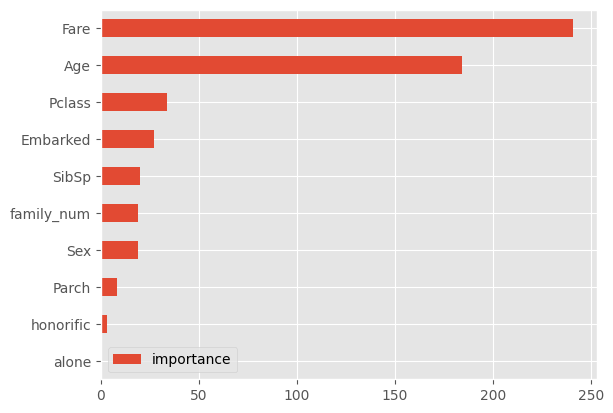

In [ ]:
# 각 열 명을 표시한 데이터프레임 생성 & 시각화
importance = pd.DataFrame(model_lgb.feature_importance(),index = X_train.columns, columns = ["importance"]).sort_values(by = "importance", ascending = True)
importance.plot.barh()

-> Fare, Age, Pclass 등이 중요한 변수로 파악

-> 어린 아이들이 우선적으로 구조되었을 가능성이 높고, 상위 클래스 고객(Pclass나 Fare가 더 높은 승객)이 우선적으로 구조되었을 가능성을 엿볼 수 있음

In [ ]:
# 검증 데이터로 예측 정확도 확인
# 정확도가 가장 높을 때의 학습 모델을 사용하여 예측
y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration)

예측 정확도란?

: 모든 예측 중 정확하게 예측한 비율

-> 예측 값과 실제 값의 분류 결과

실제 값 1, 예측 값 1 : 진양성

실제 값 1, 예측 값 0 : 위음성

실제 값 0, 예측 값 1 : 위양성

실제 값 0, 예측 값 0 : 진음성

In [ ]:
# 정확도 계산
accuracy_score(y_valid, np.around(y_pred))

0.8435754189944135

-> 0.84355754189944135의 정확도 보임

-> 이를 기준으로 개선해보자

하이퍼 파라미터 개선

하이퍼 파라미터 / 기본값 / 설명

learning_rate / 0.1 / 학습 속도 (각 과정의 학습을 어느 정도 반영할지 결정)

max_bin / 255 / 분기 한개에 들어가는 데이터의 최대값, 작으면 잘게 나누어 진행, 크면 범용성 높아짐

num_leaves / 31 / 하나의 결정 트리에 포함된 최대 노드 개수, 결정 트리의 복잡성 제어

min_data_in_leaf / 20 / 결정 트리 중 하나의 가지당 할당되는 데이터 수, 과도한 학습을 제어하기 위해 설정, 데이터 수에 따라 조정

In [ ]:
# 하이퍼파라미터 재설정
lgbm_params = {
    "objective" : "binary",
    "max_bin" : 331,
    "num_leaves" : 20,
    "min_data_in_leaf" : 57,
    "random_seed" : 1234
}

In [ ]:
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature = categories)
lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature = categories, reference = lgb_train)

In [ ]:
model_lgb = lgb.train(lgbm_params,
                      lgb_train,
                      valid_sets = lgb_eval,
                      num_boost_round = 100,
                      early_stopping_rounds = 20,
                      verbose_eval = 10)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Datas

[LightGBM] [Info] Number of positive: 272, number of negative: 440
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382022 -> initscore=-0.480973
[LightGBM] [Info] Start training from score -0.480973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

In [ ]:
y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration)

In [ ]:
accuracy_score(y_valid, np.around(y_pred))

0.8435754189944135

In [ ]:
# 교차 검증을 이용한 학습
folds = 3
kf = KFold(n_splits = folds)

In [ ]:
models = []

for train_index, val_index in kf.split(train_X):
  X_train = train_X.iloc[train_index]
  X_valid = train_X.iloc[val_index]
  y_train = train_Y.iloc[train_index]
  y_valid = train_Y.iloc[val_index]

  lgb_train = lgb.Dataset(X_train, y_train, categorical_feature = categories)
  lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature = categories, reference = lgb_train)

  model_lgb = lgb.train(lgbm_params,
                      lgb_train,
                      valid_sets = lgb_eval,
                      num_boost_round = 100,
                      early_stopping_rounds = 20,
                      verbose_eval = 10)

  y_pred = model_lgb.predict(X_valid, num_iteration = model_lgb.best_iteration)
  print(accuracy_score(y_valid, np.around(y_pred)))
  models.append(model_lgb)

[LightGBM] [Info] Number of positive: 236, number of negative: 358
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 206
[LightGBM] [Info] Number of data points in the train set: 594, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.397306 -> initscore=-0.416701
[LightGBM] [Info] Start training from score -0.416701
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Datas

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[20]	valid_0's binary_logloss: 0.466354
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[30]	valid_0's binary_logloss: 0.45598
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Datas


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[40]	valid_0's binary_logloss: 0.422292
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Datas


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	valid_0's binary_logloss: 0.378166
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [ ]:
preds = []

for model in models :
  pred = model.predict(test_X)
  preds.append(pred)

In [ ]:
preds_array = np.array(preds)
preds_mean = np.mean(preds_array, axis = 0)

In [ ]:
preds_int = (preds_mean > 0.5).astype(int)

In [ ]:
submission["Survived"] = preds_int

In [ ]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submission.to_csv("경로/파일명.csv", index = False)